In [6]:
#|default_exp app

In [30]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai gradio nbdev

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

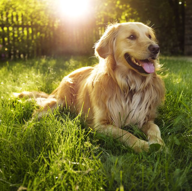

In [7]:
im = PILImage.create("dog.jpg")
im.thumbnail((192, 192))
im

In [9]:
#|export
learn = load_learner("model.pkl")

In [11]:
learn.predict(im)

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


('False', TensorBase(0), TensorBase([1.0000e+00, 4.3508e-07]))

In [14]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [16]:
classify_image(im)

{'Dog': 0.9999995231628418, 'Cat': 4.350849280854163e-07}

In [28]:
#|export
image = gr.Image(shape = (192, 192))
label = gr.Label()
examples = ["dog.jpg", "cat.jpg"]

app = gr.Interface(fn = classify_image, inputs=image, outputs=label, examples=examples)
app.launch(inline = False)

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


In [37]:
from nbdev import export
export.nb_export("app.ipynb")